<a href="https://colab.research.google.com/github/vpagonis/CRCbook/blob/main/Chapter_6_Complex_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6 - Complex Numbers

This notebook contains the code for the example problems found in Chapter 6.

**Example 6.1: Properties of Complex numbers**

In [1]:
%reset -f

import cmath as cm

print('-'*28,'CODE OUTPUT','-'*29,'\n')

z = 3+4j
zconj = z.conjugate()
print('The imaginary part of ',z, 'is ',z.imag)
print('The real part of ',z, 'is ',z.real,'\n')

print('The complex conjugate of ',z, 'is ',z.conjugate())
print('The magnitude of modulus of ',z, 'is ',abs(z))

print('\nUse cmath for angle, polar from, and Cartesian form ')
print('phase = ',round(cm.phase(z),2),' rad','\n')

print('Polar form (r,theta) = ',cm.polar(z))
print('Cartesian form = ',cm.rect(5,0.927295))

---------------------------- CODE OUTPUT ----------------------------- 

The imaginary part of  (3+4j) is  4.0
The real part of  (3+4j) is  3.0 

The complex conjugate of  (3+4j) is  (3-4j)
The magnitude of modulus of  (3+4j) is  5.0

Use cmath for angle, polar from, and Cartesian form 
phase =  0.93  rad 

Polar form (r,theta) =  (5.0, 0.9272952180016122)
Cartesian form =  (3.0000008720063773+3.9999993459950685j)


**Example 6.2: Plotting complex numbers in the xy-plane**

---------------------------- CODE OUTPUT ----------------------------- 



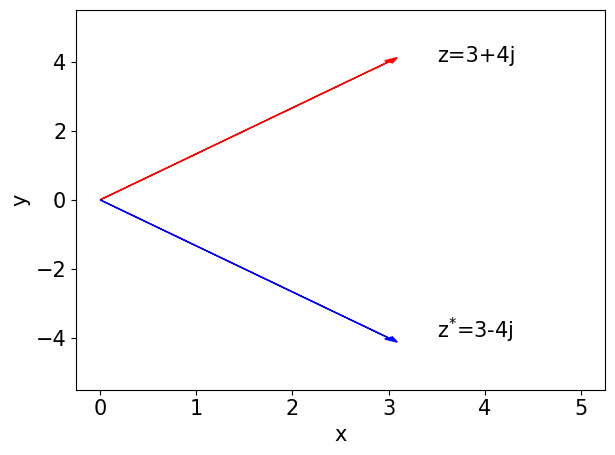

In [2]:
%reset -f

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["font.size"] = 15
print('-'*28,'CODE OUTPUT','-'*29,'\n')

z = 3+4j
zconj = z.conjugate()  # define complex number and its conjugate

# define scale of plot, and plot arrows and text
plt.scatter([0,5],[-5,5],s=0 );

plt.arrow(0,0,z.real,z.imag, color='red', head_width = 0.1)
plt.arrow(0,0,zconj.real,zconj.imag, color='blue',  head_width = 0.1)

plt.xlabel('x')
plt.ylabel('y')
plt.text(3.5,4,'z=3+4j')
plt.text(3.5,-4,r'z$^{*}$=3-4j')

plt.tight_layout()
plt.show()

**Example 6.3: The complex exponential and simple harmonic motion**

In [3]:
%reset -f

from sympy import symbols, exp, diff, I
print('-'*28,'CODE OUTPUT','-'*29,'\n')

A1, A2, omeg, k, m ,t = symbols('A1, A2, omeg, k, m ,t',real=True)
# define symbols

f = A1*exp(I*omeg*t)+A2*exp(-I*omeg*t)  # define function

secondDeriv = diff( f,t,t)
print('Second Derivative = ',secondDeriv,'\n')

secondDeriv == -omeg**2*f   # check that equation is satisfied

---------------------------- CODE OUTPUT ----------------------------- 

Second Derivative =  -omeg**2*(A1*exp(I*omeg*t) + A2*exp(-I*omeg*t)) 



True

**Example 6.4: Symbolic addition of complex wavefunctions**

In [4]:
%reset -f

from sympy import symbols, exp, Abs, sin, I, simplify
import textwrap
print('-'*28,'CODE OUTPUT','-'*29,'\n')

psi1, psi2 ,E1 ,E2, t = symbols('psi1, psi2, E1, E2,t '\
                                ,real=True)
# define symbols

psi = psi1*exp(-I*E1*t)+psi2*exp(-I*E2*t)

psisq = Abs(psi)**2
print('psi^2 = ')

wrapper = textwrap.TextWrapper(width=50)
lines = wrapper.wrap(text=str(psisq))
for x in lines:
    print(x)

u = psisq.rewrite(sin)
print('\npsi^2 with trig functions = ')
print(simplify(u))

---------------------------- CODE OUTPUT ----------------------------- 

psi^2 = 
psi1**2 + psi1*psi2*exp(I*E1*t)*exp(-I*E2*t) +
psi1*psi2*exp(-I*E1*t)*exp(I*E2*t) + psi2**2

psi^2 with trig functions = 
psi1**2 + 2*psi1*psi2*cos(t*(E1 - E2)) + psi2**2


**Example 6.5: Beat waves**

---------------------------- CODE OUTPUT ----------------------------- 

Real part of f =  cos(t - x) + cos(1.1*t - 1.2*x)


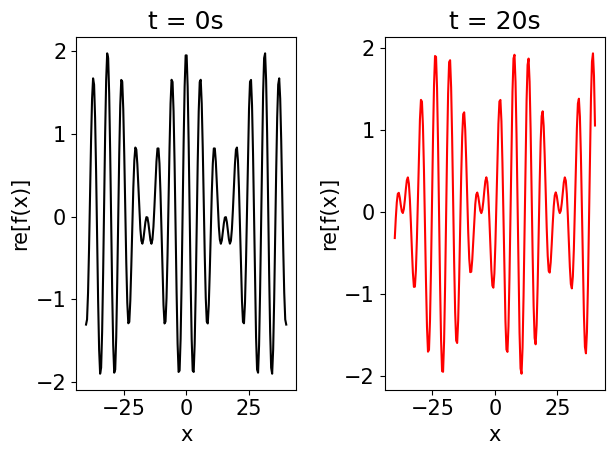

In [5]:
%reset -f

from sympy import symbols, exp, sin, I, re, simplify, lambdify
import numpy as np
import matplotlib.pyplot as plt
print('-'*28,'CODE OUTPUT','-'*29,'\n')
a, b, t, x = symbols('a, b, t, x',real=True)

# f = sum of complex exponentials
f = exp(-I*t)*exp(I*x)+exp(-1.1*I*t)*exp(1.2*I*x)
u = re(f.rewrite(sin))                            # real part of f
print('Real part of f = ',simplify(u))

tot = lambdify([t,x],u)                 # create function for plot

xpos = np.linspace(-40,40,200)          # create x-positions, plot x(t)

# two plots at time t=0 s and t=20 s
plt.subplot(1,2,1)
plt.plot(xpos,tot(0,xpos),'k')

plt.xlabel('x')
plt.ylabel('re[f(x)]')
plt.title('t = 0s')

plt.subplot(1,2,2)
plt.plot(xpos,tot(20,xpos),'r')

plt.xlabel('x')
plt.ylabel('re[f(x)]')
plt.title('t = 20s')

plt.tight_layout()

plt.show()

**Example 6.6: Probabilities of quantum states**

In [6]:
%reset -f

import numpy as np
print('-'*28,'CODE OUTPUT','-'*29,'\n')

z0 = (2 + 3j)/np.sqrt(18)
z3 = (1 - 2j)/np.sqrt(18)

print('Probability to be in state 0 = ', round(abs(z0)**2,2))
print('Probability to be in state 3 = ', round(abs(z3)**2,2))

---------------------------- CODE OUTPUT ----------------------------- 

Probability to be in state 0 =  0.72
Probability to be in state 3 =  0.28


**Example 6.7: Current and voltage in an inductor AC circuit**

---------------------------- CODE OUTPUT ----------------------------- 



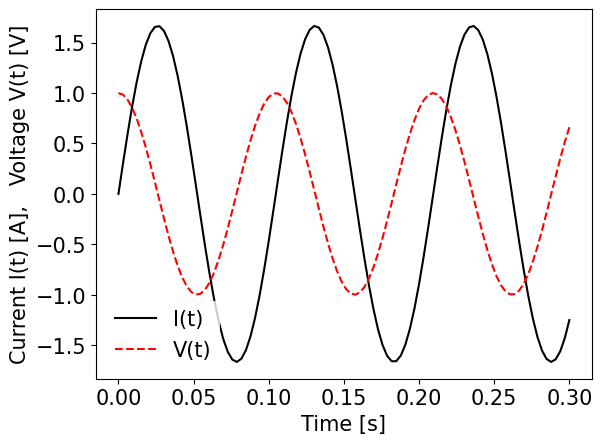

In [7]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np
from sympy.utilities.lambdify import lambdify
from sympy import symbols, I,  exp, re
print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define symbols
L, V, i, omeg, Vo, theta1, t = symbols('L, V, i, omeg, Vo,\
theta1, t ',positive=True)

Z =  I*omeg*L                    # complex impedance for inductor

V = Vo*exp(I*(omeg*t+theta1))    # input voltage V

i = V/Z                          # Ohm's law for inductor

tims = np.linspace(0,0.3,100)    # sequence of times tims

# substitute numerical values to current and voltage, and take real part
i1 = lambdify(t,re(i.subs({Vo:1,omeg:60,theta1:0,L:0.01})))
v1 = lambdify(t,re(V.subs({Vo:1,omeg:60,theta1:0,L:0.01})))

# plot current i1(t) and voltage v1(t)
plt.plot(tims,i1(tims),'k-',label='I(t)')
plt.plot(tims,v1(tims),'r--',label='V(t)')

plt.xlabel('Time [s]')
plt.ylabel("Current I(t) [A],   Voltage V(t) [V]")
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.show()

**Example 6.8: Impedance in series RLC circuit**

In [8]:
%reset -f

from sympy import symbols, Abs, im, I, re
print('-'*28,'CODE OUTPUT','-'*29,'\n')

R, L, C, omeg = symbols('R, L, C, omeg',real=True)

Z = R + I*(omeg*L-1/(omeg*C))  # complex impedance

print('Magnitude of Z =',Abs(Z))
print('tan(phi) =',im(Z)/re(Z))

---------------------------- CODE OUTPUT ----------------------------- 

Magnitude of Z = sqrt(L**2*omeg**2 + R**2 - 2*L/C + 1/(C**2*omeg**2))
tan(phi) = (L*omeg - 1/(C*omeg))/R


**Example 6.9: Solving an equation of complex variables**

In [9]:
%reset -f

from sympy import symbols, solve,  I
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y = symbols('x, y',real=True)      # symbols

sol = solve((x+I*y)**2-2*I*x,[x,y])  # solve equation for (x,y)

print('Possible solutions are the pairs (x,y):\n',sol)

---------------------------- CODE OUTPUT ----------------------------- 

Possible solutions are the pairs (x,y):
 [(-1, 1), (0, 0), (1, 1)]


**Example 6.10: Solutions of the externally driven damped harmonic oscillator**

In [10]:
%reset -f

from sympy import symbols, exp, diff, simplify , I, re, im, solve
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, t, omeg, omeg0, A, phi , gam, D = symbols(\
'x, t, omeg, omeg0 ,A, phi, gam, D', positive=True)  # symbols

x = A*exp(I*omeg*t-I*phi)  # complex trial function

eq = diff(x,t,t)+2*gam*diff(x,t)+omeg0**2*x-D*exp(I*omeg*t)

# divide equation by trial function
ans = simplify(eq/exp(I*omeg*t-I*phi))

print('SHO Equation = ',ans)

print('\nThe first equation for D and A is: ',re(ans),'= 0\n')

print('The second equation for D and A is: ',im(ans),'= 0')

---------------------------- CODE OUTPUT ----------------------------- 

SHO Equation =  2*I*A*gam*omeg - A*omeg**2 + A*omeg0**2 - D*exp(I*phi)

The first equation for D and A is:  -A*omeg**2 + A*omeg0**2 - D*cos(phi) = 0

The second equation for D and A is:  2*A*gam*omeg - D*sin(phi) = 0


**Example 6.11: Roots of complex numbers**

---------------------------- CODE OUTPUT ----------------------------- 

Possible solutions are the complex numbers (x,y):
x, y =  -2 ,  0
x, y =  1 ,  -sqrt(3)
x, y =  1 ,  sqrt(3)


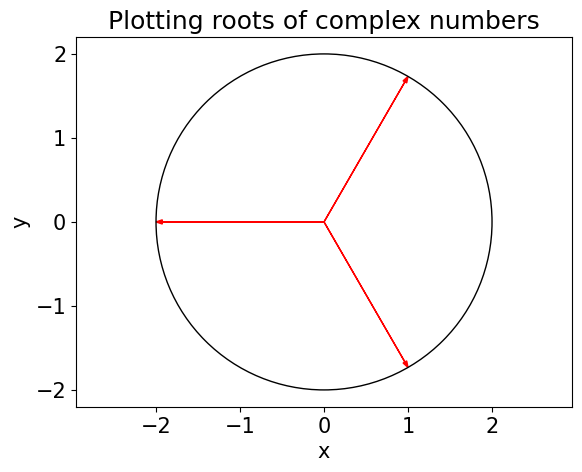

In [11]:
%reset -f

from sympy import symbols, solve,  I
import matplotlib.pyplot as plt
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y = symbols('x, y',real=True)   # define symbols

sol = solve((x+I*y)**3+8,[x,y])   # solve equation for (x,y)
print('Possible solutions are the complex numbers (x,y):')

# loop to print possible solutions
for j in range(len(sol)):
    print('x, y = ',sol[j][0], ', ',sol[j][1])

# function for plotting arrows
def f(x1,y1):
    plt.arrow(0,0,x1,y1, color='red', head_width = 0.05,length_includes_head=True)

# loop calling function f to plot arrows
plt.scatter([-2,2],[-2,2],s=0 );
for j in range(len(sol)):
    f(float(sol[j][0]), float(sol[j][1]))

plt.title('Plotting roots of complex numbers')

# make the size of x and y axes the same on the plot
plt.axis("equal")

#plot circle
circle = plt.Circle((0, 0), 2.0, fill = False)

plt.gca().add_patch(circle)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Example 6.12: General properties of hyperbolic functions**

In [12]:
%reset -f

from sympy import symbols, diff, sinh, cosh, simplify, integrate
print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define symbol x
x = symbols('x ',real=True)

print('cosh(x)**2 - sinh(x)**2 = ',simplify(cosh(x)**2-sinh(x)**2))

print('\nThe derivative of cosh(x) = ', simplify(diff(cosh(x),x)))

print('\nThe indefinite integral of cosh(x) = ', \
simplify(integrate(cosh(x),x)))

---------------------------- CODE OUTPUT ----------------------------- 

cosh(x)**2 - sinh(x)**2 =  1

The derivative of cosh(x) =  sinh(x)

The indefinite integral of cosh(x) =  sinh(x)


**Example 6.13: Spin states in quantum mechanics**

In [13]:
%reset -f

import numpy as np
from sympy import I,sqrt

chi = np.array([1-I,-2*I])
chi_star = np.conjugate(chi)
norm_const = sqrt(np.dot(chi,chi_star).simplify())

norm_chi = chi/norm_const
p_up = np.dot(np.conjugate(norm_chi)[0],norm_chi[0])

print('-'*28,'CODE OUTPUT','-'*29,'\n')

print('The normalizing constant is ',norm_const)
print('The probability for spin up is ', p_up.simplify())

---------------------------- CODE OUTPUT ----------------------------- 

The normalizing constant is  sqrt(6)
The probability for spin up is  1/3
